Tratamento números

In [12]:
import pandas as pd
import re

df = pd.read_excel("consoles.xlsx")

df['preco'] = (
    df['preco']
    .str.replace('R\$', '', regex=True)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

def extrair_qtd_parcelas(texto):
    if pd.isna(texto):
        return None
    match = re.search(r'(\d+)x', str(texto))
    if match:
        parcelas = int(match.group(1))
        if "pix" in str(texto).lower():
            return f"{parcelas}x no Pix"
        else:
            return f"{parcelas}x no Cartão"
    return None

def extrair_parcela(texto):
    if pd.isna(texto):
        return None
    match = re.search(r'R\$ ([\d\.,]+)', str(texto))
    if match:
        valor = match.group(1).replace('.', '').replace(',', '.')
        return float(valor)
    return None

df['qtd_parcelas'] = df['parcela'].apply(extrair_qtd_parcelas)
df['valor_parcela'] = df['parcela'].apply(extrair_parcela)

def detectar_marca(titulo):
    titulo = str(titulo).lower()
    if "playstation" in titulo:
        return "PlayStation"
    elif "nintendo" in titulo:
        return "Nintendo"
    elif "xbox" in titulo:
        return "Xbox"
    else:
        return "Outros"

df['marcas'] = df['titulo'].apply(detectar_marca)

df['titulo'] = df['titulo'].str.title()

def faixa_preco(preco):
    if preco < 2000:
        return "Barato"
    elif preco < 4000:
        return "Médio"
    else:
        return "Caro"

df['faixa_preco'] = df['preco'].apply(faixa_preco)

def edicao_especial(titulo):
    titulo = str(titulo).lower()
    return "edição especial" in titulo or "bundle" in titulo

df['edicao_especial'] = df['titulo'].apply(edicao_especial)

df = df.drop(columns=['parcela'])

df.to_excel("consoles_tratado_completo.xlsx", index=False)


<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
C:\Users\47377942878\AppData\Local\Temp\ipykernel_4480\2484546199.py:10: SyntaxWarning: invalid escape sequence '\$'
  .str.replace('R\$', '', regex=True)


Análise

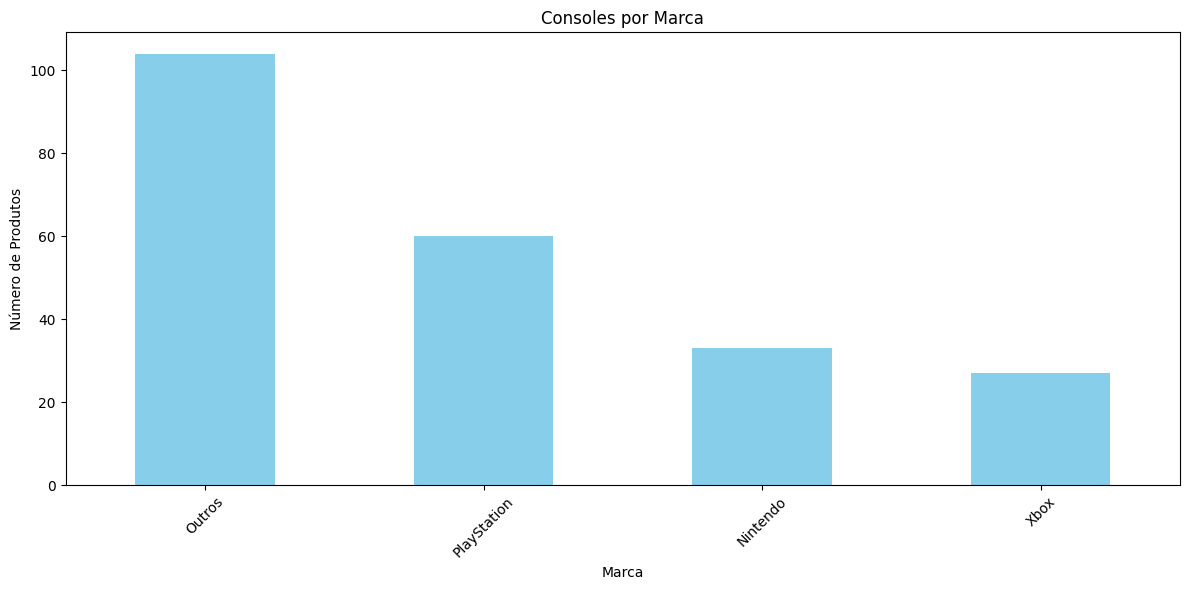

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('consoles_tratado_completo.xlsx')
consoles_por_marca = df['marcas'].value_counts()
consoles_por_marca.plot(kind='bar', color='skyblue', figsize=(12, 6))
plt.title('Consoles por Marca')
plt.xlabel('Marca')
plt.ylabel('Número de Produtos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
